In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
new_combined = pd.read_csv("bike_csv_final_22.csv", index_col = 0)


/Users/diana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,9,20,21,28,31,34,36,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = new_combined[["longitude", "latitude", "id"]]
data.dropna(inplace = True)

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
import folium 
from folium.plugins import FastMarkerCluster
some_map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=4)
callback = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red",  radius: 5000});'
                'return circle};')
some_map.add_child(FastMarkerCluster(data[["latitude", 'longitude']].values.tolist(), callback=callback))

In [5]:
some_map.save("my_map_3.html")

In [4]:
only_stolen = new_combined[new_combined["stolen"] == True]
only_stolen["date"] = pd.to_datetime(only_stolen["date_stolen_string"], unit = 'ns')


/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
only_stolen_filtered = only_stolen[only_stolen["date"] > "2010.01.01"]

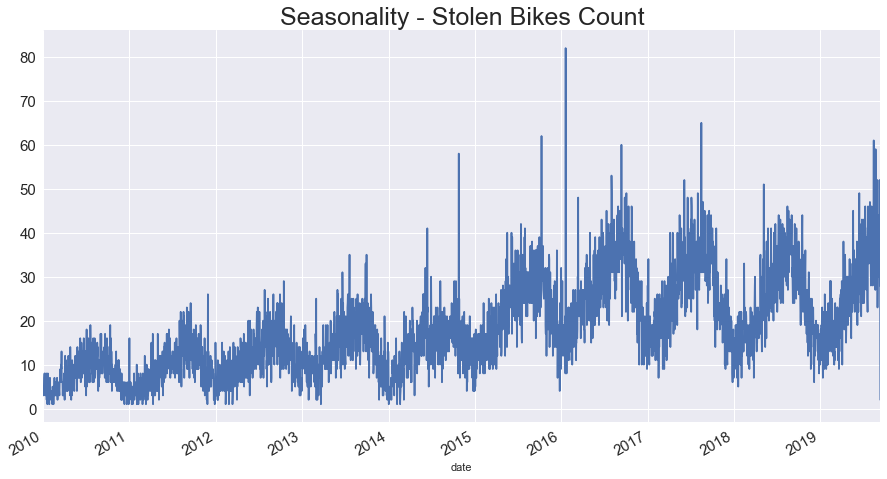

In [7]:
plt.figure(figsize = (15, 8))
plt.yticks(size = "15")
plt.xticks(size = "15")
plt.style.use("seaborn")
plt.title("Seasonality - Stolen Bikes Count", size = '25')
only_stolen_filtered.groupby("date")["id"].count().plot()
plt.savefig("seasonality", bbox_inches='tight')



In [12]:
only_stolen_filtered_2017 =  only_stolen[(only_stolen["date"] >= "2017.01.01") & (only_stolen["date"] < "2018.01.01")]

In [13]:
only_stolen_filtered_2017.groupby("date")["id"].count().sort_values()

date
2017-12-26     6
2017-12-31     7
2017-12-30     7
2017-02-16     7
2017-12-25     8
2017-03-12     9
2017-11-26     9
2017-03-06     9
2017-11-23    10
2017-01-08    10
2017-12-04    10
2017-02-12    11
2017-03-22    11
2017-01-07    11
2017-12-03    11
2017-02-03    11
2017-01-22    12
2017-03-17    12
2017-01-18    12
2017-01-06    12
2017-12-02    12
2017-11-25    13
2017-11-24    13
2017-01-25    13
2017-12-22    13
2017-03-23    13
2017-12-17    13
2017-01-05    13
2017-12-12    13
2017-03-09    14
              ..
2017-08-13    39
2017-06-07    39
2017-07-14    40
2017-05-07    40
2017-04-17    40
2017-09-21    40
2017-06-25    40
2017-04-06    40
2017-10-18    41
2017-07-11    41
2017-10-02    41
2017-06-22    41
2017-10-01    41
2017-05-23    41
2017-07-09    42
2017-07-03    43
2017-07-18    43
2017-08-26    44
2017-09-11    44
2017-09-26    44
2017-05-16    44
2017-08-30    45
2017-09-18    45
2017-07-06    46
2017-08-23    47
2017-07-05    48
2017-06-19    48
2017-08-0

In [9]:
only_stolen_filtered_2016 =  only_stolen[(only_stolen["date"] >= "2016.01.01") & (only_stolen["date"] < "2017.01.01")]

In [11]:
only_stolen_filtered_2016.groupby("date")["id"].count().sort_values()

date
2016-01-24     8
2016-01-19     8
2016-12-29     9
2016-12-07    10
2016-12-16    10
2016-02-17    10
2016-11-26    10
2016-02-02    11
2016-12-17    11
2016-02-14    11
2016-03-04    11
2016-12-22    12
2016-12-27    12
2016-12-09    12
2016-01-09    12
2016-02-10    13
2016-02-12    13
2016-01-03    13
2016-01-23    13
2016-12-25    13
2016-01-12    13
2016-12-23    13
2016-02-15    13
2016-12-08    14
2016-12-26    14
2016-01-27    14
2016-01-28    14
2016-02-09    14
2016-02-24    14
2016-11-19    15
              ..
2016-09-18    40
2016-06-26    40
2016-09-15    40
2016-08-28    41
2016-10-02    41
2016-08-09    41
2016-08-08    41
2016-09-16    41
2016-08-25    42
2016-08-24    42
2016-07-28    42
2016-07-18    42
2016-07-13    42
2016-10-06    43
2016-06-20    43
2016-08-11    43
2016-08-26    44
2016-10-26    45
2016-09-06    45
2016-07-11    45
2016-08-29    46
2016-10-12    46
2016-10-25    46
2016-03-13    48
2016-09-26    48
2016-08-02    49
2016-10-03    49
2016-08-0

In [7]:
only_stolen_filtered_2018 =  only_stolen[(only_stolen["date"] >= "2018.01.01") & (only_stolen["date"] < "2019.01.01")]

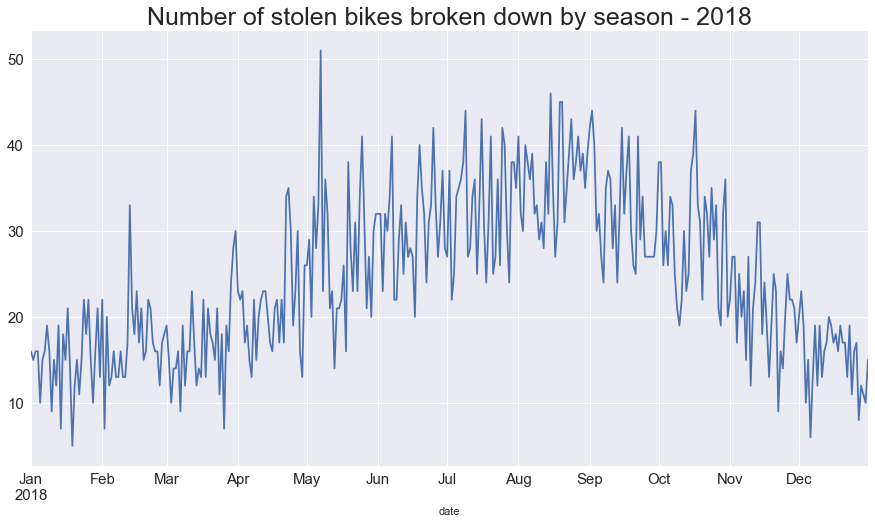

In [8]:
plt.figure(figsize = (15, 8))
plt.yticks(size = "15")
plt.xticks(size = "15")
plt.style.use("seaborn")
only_stolen_filtered_2018.groupby("date")["id"].count().plot()
plt.title("Number of stolen bikes broken down by season - 2018", size = '25') 
plt.savefig("seasonality-2018", bbox_inches='tight')

In [10]:
new_combined['theft_description'].dropna(inplace = True)

In [11]:
all_words_bike_theft_description = new_combined["theft_description"].tolist()

In [12]:
pd.Series(' '.join(new_combined['theft_description']).lower().split()).value_counts()[["garage", "shopping", "home", "building", "apartment", "store", "restaurant", "storage", "school", "parking", "inside", "outside"]].sort_values(ascending=False)

garage        8763
apartment     3276
outside       3266
inside        2552
home          2431
parking       2393
building      1904
storage       1457
school         693
store          599
restaurant     252
shopping       122
dtype: int64

In [13]:
new_combined["locking_description"].dropna(inplace = True)
new_combined["locking_description"].value_counts()

Lock is missing, along with the bike.                                            8959
Lock was cut, and left at the scene.                                             6585
Other situation, please describe below.                                          4519
Bike was not locked                                                              3587
Object that bike was locked to was broken, removed, or otherwise compromised.    1245
Lock was opened, and left unharmed at the scene.                                  405
Lock is missing, along with the bike                                              404
Lock was cut, and left at the scene                                               356
Other situation, please describe below                                            181
Object that bike was locked to was broken, removed, or otherwise compromised       58
Lock was opened, and left unharmed at the scene                                    20
Name: locking_description, dtype: int64

In [14]:
new_combined.replace(["Lock was cut, and left at the scene", "Lock is missing, along with the bike", "Other situation, please describe below", "Object that bike was locked to was broken, removed, or otherwise compromised", "Lock was opened, and left unharmed at the scene"], ["Lock was cut, and left at the scene.", "Lock is missing, along with the bike.", "Other situation, please describe below.", "Object that bike was locked to was broken, removed, or otherwise compromised.", "Lock was opened, and left unharmed at the scene."], inplace = True)

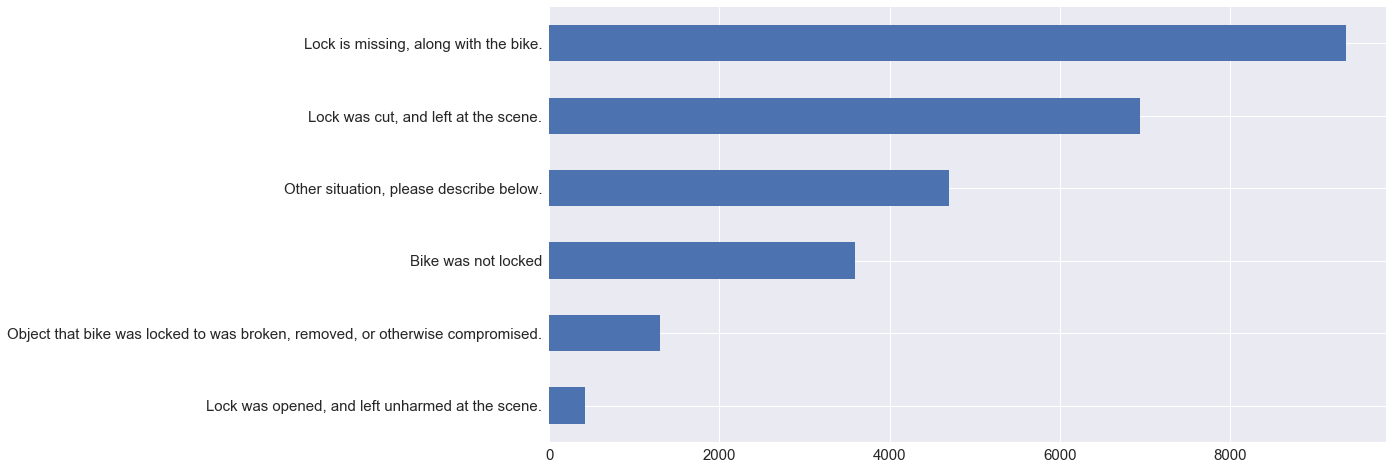

In [15]:
plt.figure(figsize = (15, 8))
plt.yticks(size = "15")
plt.xticks(size = "15")
plt.style.use("seaborn")
new_combined["locking_description"].value_counts().sort_values().plot.barh()
plt.savefig("locking_description.png", bbox_inches='tight')


In [16]:
all_words = (new_combined["theft_description"].dropna().to_list())[:1000000]

In [17]:
str1 = ''.join(all_words)

In [18]:
# import spacy
# from collections import Counter
# nlp = spacy.load('en_core_web_sm') 
# nlp.max_length = 5042984
# doc = nlp(str1)
# # all tokens that arent stop words or punctuations
# words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

# # noun tokens that arent stop words or punctuations
# nouns = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "NOUN"]

# # five most common tokens
# word_freq = Counter(words)
# common_words = word_freq.most_common(50)

# # five most common noun tokens
# noun_freq = Counter(nouns)
# common_nouns = noun_freq.most_common(20)




In [19]:
cleaned_stolen = only_stolen[["frame_colors", "police_report_number", "frame_model", "manufacturer_name", "year", "frame_material", "frame_size", "type_of_cycle", "rear_tire_narrow", "front_tire_narrow", "lock_defeat_description", "locking_description"]]
        

In [20]:
frame_color_counts = cleaned_stolen["frame_colors"].value_counts()

In [21]:
cleaned_stolen['frame_colors'] = np.where(cleaned_stolen['frame_colors'].isin(frame_color_counts.index[frame_color_counts <= 200]), 'Other', cleaned_stolen['frame_colors'])

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
frame_model = cleaned_stolen["frame_model"].value_counts()

In [23]:
cleaned_stolen['frame_model'] = np.where(cleaned_stolen['frame_model'].isin(frame_model.index[frame_model <= 50]), 'Other', cleaned_stolen['frame_model'])

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
manufacturer_name_counts = cleaned_stolen["manufacturer_name"].value_counts()

In [25]:
cleaned_stolen['manufacturer_name'] = np.where(cleaned_stolen['manufacturer_name'].isin(manufacturer_name_counts.index[manufacturer_name_counts <= 25]), 'Other', cleaned_stolen["manufacturer_name"])

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
import numpy as np
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "54cm" , 'm', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "56cm", 'l', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "26in", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "20in", 's', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "58cm", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "19in", 's', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "52cm", 's', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "17in", 'xs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "18in", 'xs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "21in", 'm', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "53cm", 'm', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "16in", 'xs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "15in", 'xxs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "17.5in", 'xs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "55cm", 'l', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "50cm", 's', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "51cm", 's', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "57cm", 'l', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "24in", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "60cm", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "49cm", 'xs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "48cm", 'xs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "19.5in", 's', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "59cm", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "61cm", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "22in", 'm', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "23in", 'l', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "29in", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "47cm", 'xs', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "62cm", 'xl', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "22.5in", 'm', cleaned_stolen['frame_size'])
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'] == "27in", 'xl', cleaned_stolen['frame_size'])


/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [27]:
frame_size_counts = cleaned_stolen["frame_size"].value_counts()
cleaned_stolen['frame_size'] = np.where(cleaned_stolen['frame_size'].isin(frame_size_counts.index[frame_size_counts <= 112]), 'Other', cleaned_stolen["frame_size"])

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
cleaned_stolen["frame_size"].value_counts()

m        9525
l        8024
s        6384
xl       6047
xs       4353
Other    1862
xxs       428
Name: frame_size, dtype: int64

In [29]:
police_stolen = cleaned_stolen.copy()

In [30]:
cleaned_stolen.drop(["lock_defeat_description", "locking_description", "police_report_number", "front_tire_narrow", 'frame_material'], axis = 1, inplace = True)


/Users/diana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
final_stolen = cleaned_stolen.dropna(axis = 0)

In [32]:
final_stolen.shape

(30241, 7)

In [33]:
final_stolen["year"] = final_stolen["year"].astype('int32')

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
final_stolen.loc[(final_stolen['year'] > 2019), "year"] = 2012

final_stolen.loc[(final_stolen['year'] < 1500), "year"] = 2012

/Users/diana/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
from sklearn.manifold import TSNE

In [36]:
import seaborn as sns

In [37]:
final_stolen.head()

frame_colors frame_model manufacturer_name  year  \
1                          ['Red']       Other              Trek  2008   
3                         ['Blue']    Marlin 5              Trek  2019   
6   ['Silver, gray or bare metal']       Other        Cannondale  2010   
7                 ['Black', 'Red']       Other              Felt  2016   
11                        ['Blue']       Other          All City  2017   

   frame_size type_of_cycle rear_tire_narrow  
1           m          Bike             True  
3           m          Bike             True  
6           m          Bike            False  
7           m          Bike             True  
11          m          Bike             True

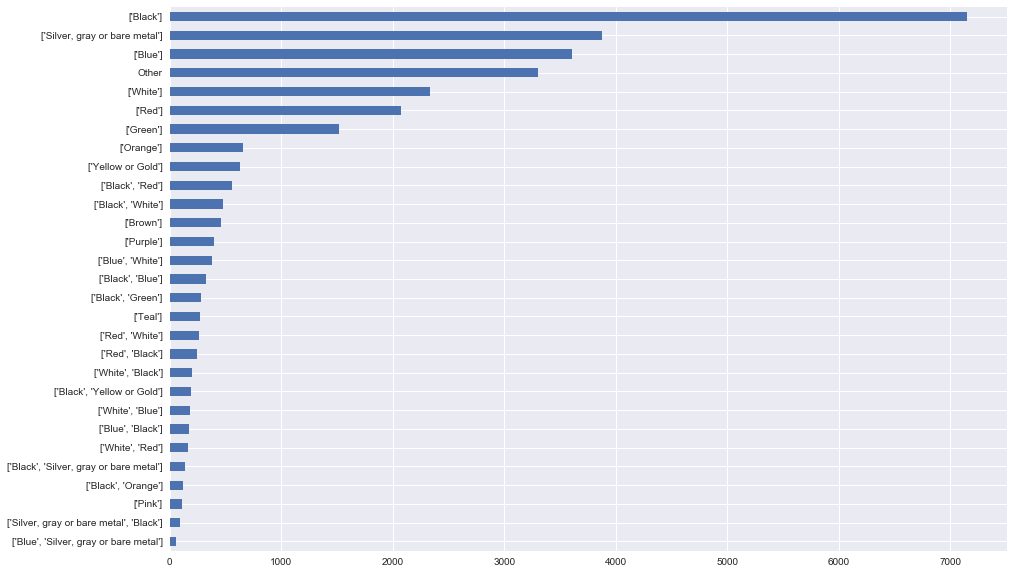

In [38]:
plt.figure(figsize = (15, 10))
final_stolen["frame_colors"].value_counts().sort_values().plot.barh()

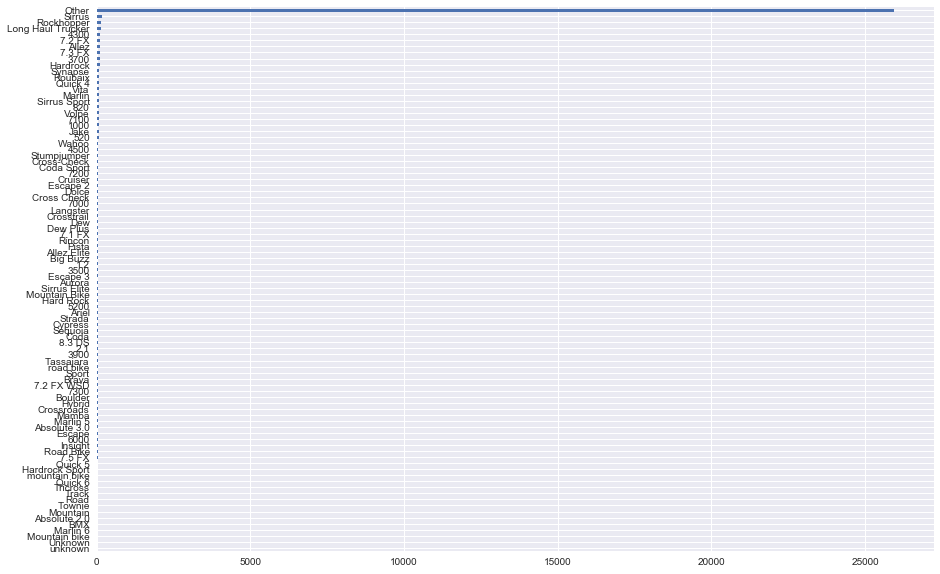

In [39]:
plt.figure(figsize = (15, 10))
final_stolen["frame_model"].value_counts().sort_values().plot.barh()

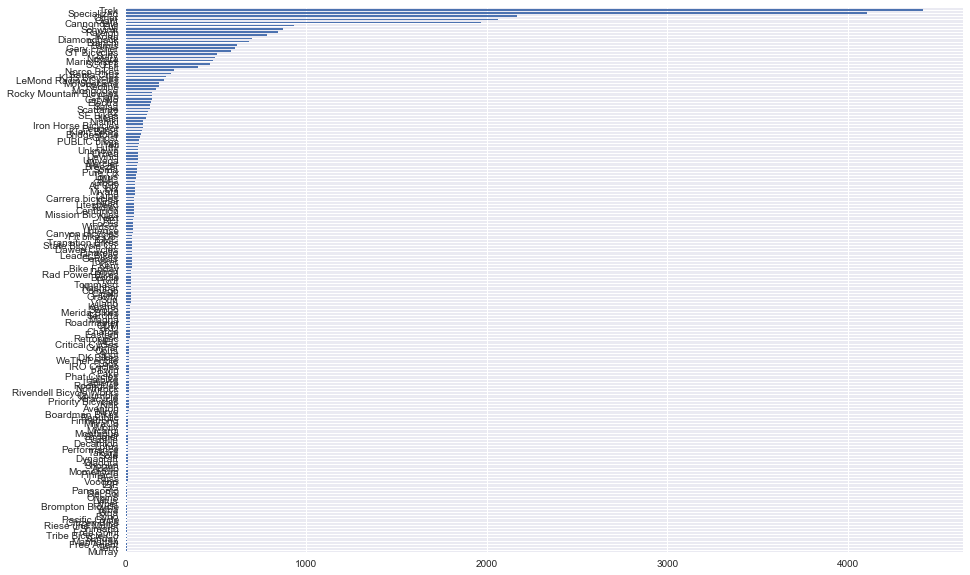

In [40]:
plt.figure(figsize = (15, 10))
final_stolen["manufacturer_name"].value_counts().sort_values().plot.barh()

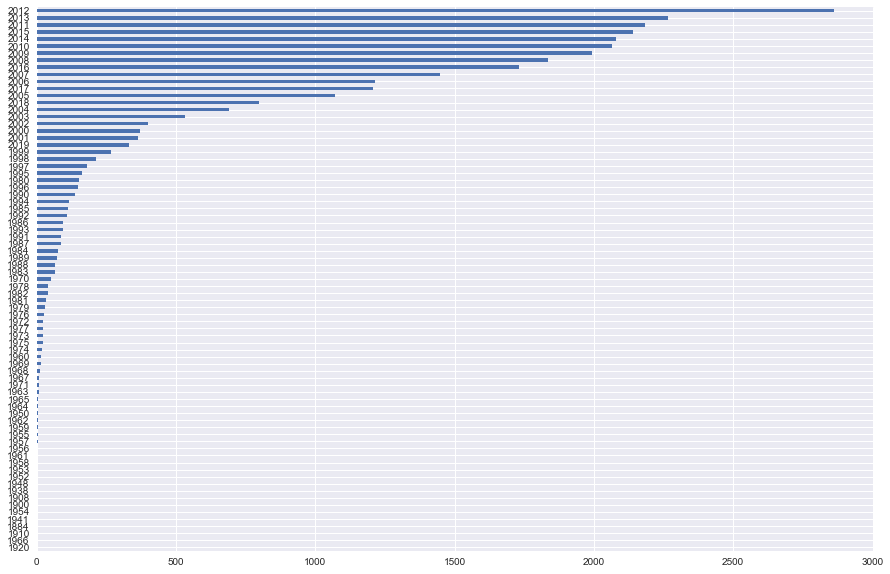

In [41]:
plt.figure(figsize = (15, 10))
final_stolen["year"].value_counts().sort_values().plot.barh()

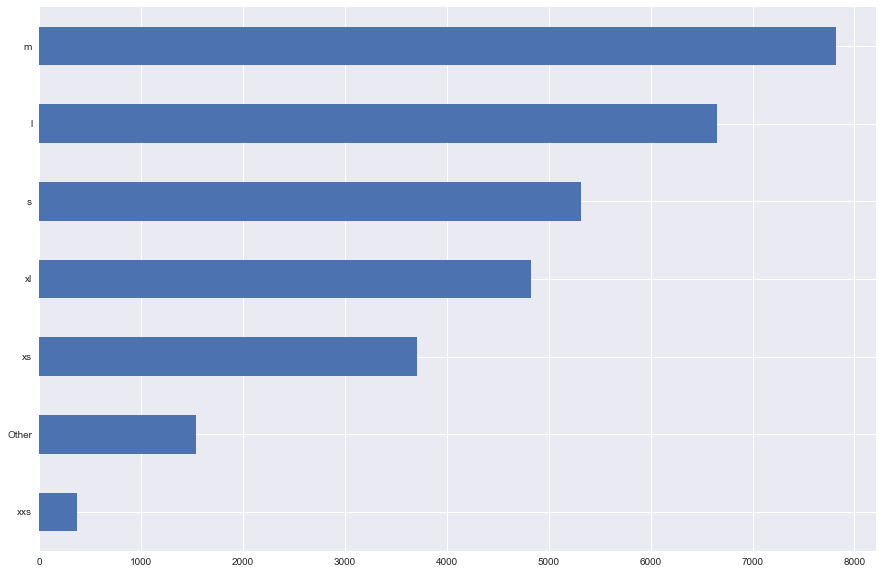

In [42]:
plt.figure(figsize = (15, 10))
final_stolen["frame_size"].value_counts().sort_values().plot.barh()

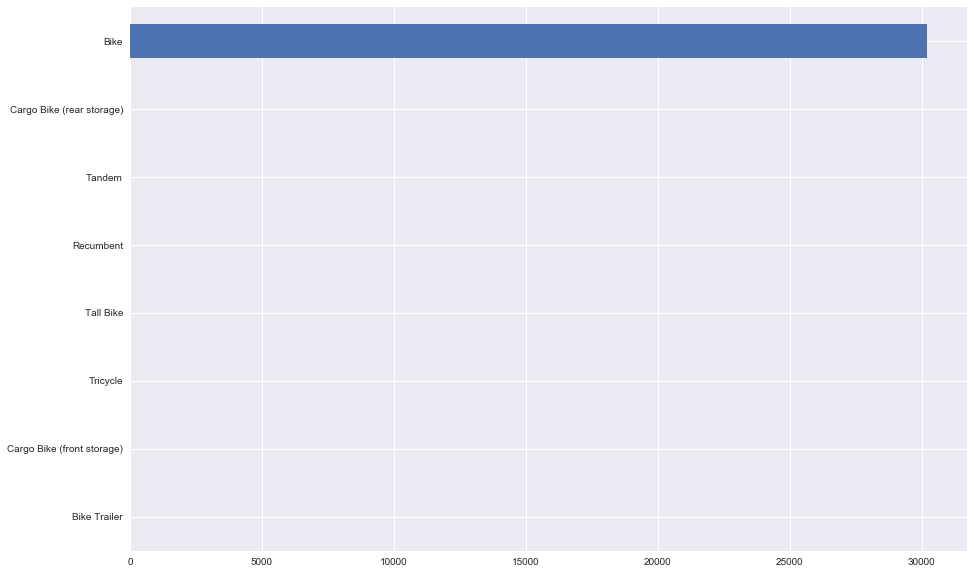

In [43]:
plt.figure(figsize = (15, 10))
final_stolen["type_of_cycle"].value_counts().sort_values().plot.barh()

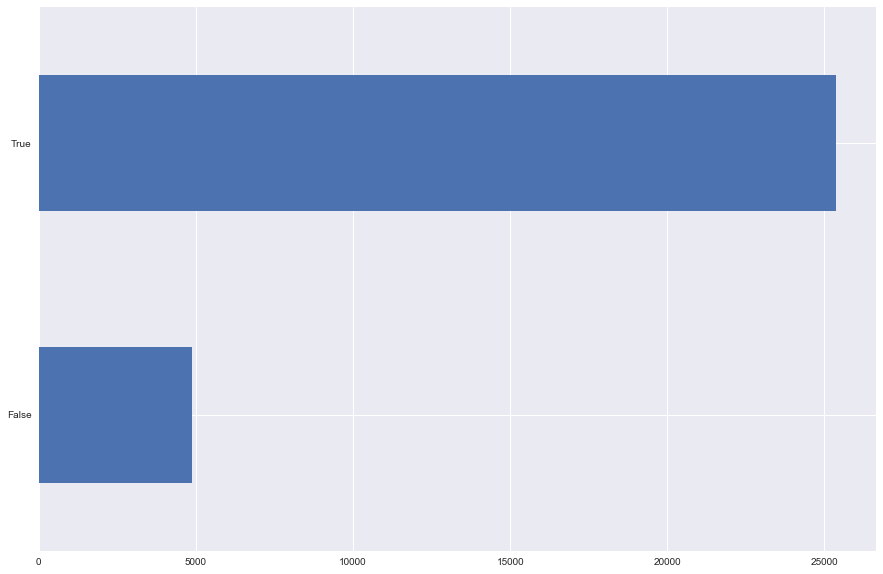

In [44]:
plt.figure(figsize = (15, 10))
final_stolen["rear_tire_narrow"].value_counts().sort_values().plot.barh()

In [66]:
final_stolen_with_dummies = pd.get_dummies(final_stolen)

In [67]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [69]:
pca = PCA(n_components=15)

In [70]:
new_final_stolen_pca = pca.fit_transform(final_stolen_with_dummies)


In [71]:
new_final_stolen_pca

array([[ 8.95101741e-01, -1.65827797e-02,  7.68348329e-01, ...,
        -3.98950487e-01,  8.14158665e-01, -4.68900605e-02],
       [-1.01031481e+01,  1.13613669e-01,  7.48658195e-01, ...,
         5.90800078e-03, -7.59852339e-03,  9.25043834e-02],
       [-1.11635455e+00,  1.07738857e+00,  7.54602834e-01, ...,
         2.48917976e-01, -9.25086916e-02, -2.94477884e-01],
       ...,
       [-6.10393939e+00, -9.28405091e-02,  7.76820843e-01, ...,
         5.12728389e-01, -1.89392473e-02,  9.36012360e-02],
       [-3.10259485e+00, -3.33248504e-01, -5.49225678e-01, ...,
        -1.84148458e-02, -6.87048849e-02,  8.04916296e-01],
       [-7.11146020e+00,  9.23759678e-01, -1.49562485e-01, ...,
         2.78412183e-01, -6.22046634e-02, -5.20139055e-01]])

Text(0.5, 0, 'transformed feature =  principal components')

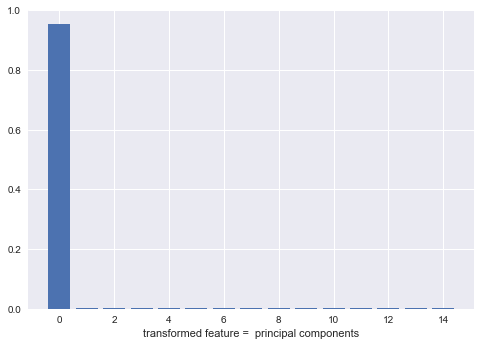

In [72]:
plt.bar(range(15), pca.explained_variance_ratio_) #can explain 80% of the variance by the first feature, this explains that yes we have 13 features, but they are redunant
plt.xlabel('transformed feature =  principal components' )

In [73]:
from sklearn.manifold import TSNE

my_tsne = TSNE(n_components=2, perplexity = 50, learning_rate = 300.0, n_iter = 300, verbose = 1).fit_transform(new_final_stolen_pca)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 30241 samples in 0.039s...
[t-SNE] Computed neighbors for 30241 samples in 7.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30241
[t-SNE] Computed conditional probabilities for sample 2000 / 30241
[t-SNE] Computed conditional probabilities for sample 3000 / 30241
[t-SNE] Computed conditional probabilities for sample 4000 / 30241
[t-SNE] Computed conditional probabilities for sample 5000 / 30241
[t-SNE] Computed conditional probabilities for sample 6000 / 30241
[t-SNE] Computed conditional probabilities for sample 7000 / 30241
[t-SNE] Computed conditional probabilities for sample 8000 / 30241
[t-SNE] Computed conditional probabilities for sample 9000 / 30241
[t-SNE] Computed conditional probabilities for sample 10000 / 30241
[t-SNE] Computed conditional probabilities for sample 11000 / 30241
[t-SNE] Computed conditional probabilities for sample 12000 / 30241
[t-SNE] Computed conditional probabilities for sa

In [74]:
my_tsne.shape

(30241, 2)

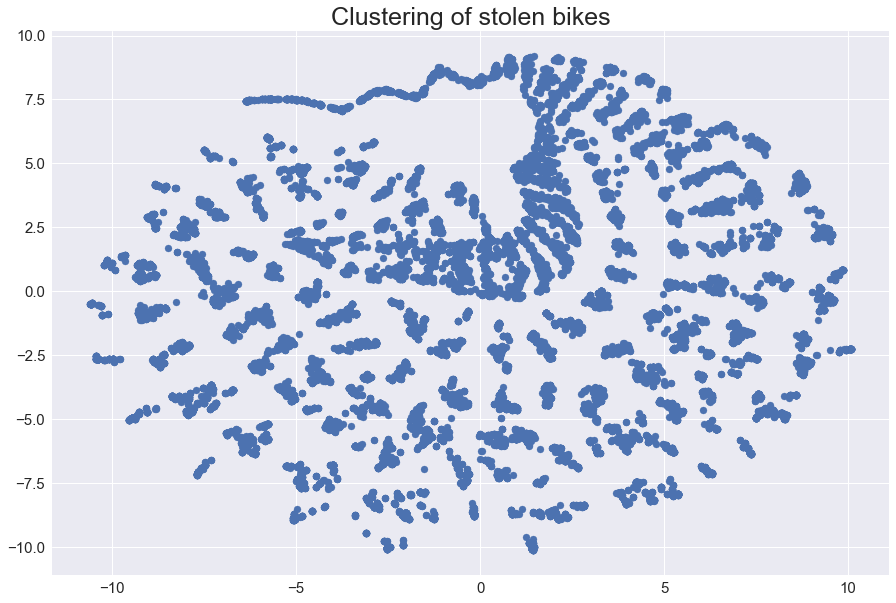

In [75]:
plt.figure(figsize = (15,10))
plt.yticks(size = "15")
plt.xticks(size = "15")
plt.style.use("seaborn")
plt.title("Clustering of stolen bikes", size = '25')
plt.scatter(my_tsne[:,0], my_tsne[:,1])
plt.savefig("Clusters", bbox_inches='tight')


In [76]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=20, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(final_stolen_with_dummies)
kmodes = km.cluster_centroids_
shape = kmodes.shape
print(shape)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10524, cost: 102191.0
Run 1, iteration: 2/100, moves: 3044, cost: 99710.0
Run 1, iteration: 3/100, moves: 2069, cost: 99380.0
Run 1, iteration: 4/100, moves: 417, cost: 99315.0
Run 1, iteration: 5/100, moves: 32, cost: 99315.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10926, cost: 97076.0
Run 2, iteration: 2/100, moves: 1110, cost: 97079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12803, cost: 94571.0
Run 3, iteration: 2/100, moves: 1894, cost: 94571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 14060, cost: 96660.0
Run 4, iteration: 2/100, moves: 3761, cost: 96522.0
Run 4, iteration: 3/100, moves: 1502, cost: 96440.0
Run 4, iteration: 4/100, moves: 59, cost: 96440.0
Init

In [77]:
km.labels_

array([0, 7, 1, ..., 0, 2, 1], dtype=uint16)

In [78]:
#For each cluster mode (a vector of "1" and "0")
#find and print the column headings where "1" appears.
#If no "1" appears, assign to "no-skills" cluster.
for i in range(shape[0]):
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in final_stolen_with_dummies.columns[np.nonzero(cent)]:
            print(j)


cluster 0: 
year
frame_model_Other
frame_size_m
type_of_cycle_Bike
rear_tire_narrow_True

cluster 1: 
year
frame_model_Other
type_of_cycle_Bike
rear_tire_narrow_False

cluster 2: 
year
frame_model_Other
frame_size_l
type_of_cycle_Bike
rear_tire_narrow_True

cluster 3: 
year
frame_colors_['Black']
frame_model_Other
frame_size_l
type_of_cycle_Bike
rear_tire_narrow_True

cluster 4: 
year
frame_model_Other
frame_size_xs
type_of_cycle_Bike
rear_tire_narrow_True

cluster 5: 
year
frame_model_Other
frame_size_xl
type_of_cycle_Bike
rear_tire_narrow_True

cluster 6: 
year
frame_colors_['Black']
frame_model_Other
frame_size_m
type_of_cycle_Bike
rear_tire_narrow_True

cluster 7: 
year
manufacturer_name_Trek
frame_size_m
type_of_cycle_Bike
rear_tire_narrow_True

cluster 8: 
year
frame_model_Other
manufacturer_name_Giant
frame_size_m
type_of_cycle_Bike
rear_tire_narrow_True

cluster 9: 
year
frame_model_Other
manufacturer_name_Specialized
frame_size_l
type_of_cycle_Bike
rear_tire_narrow_True

clus

In [85]:
final_stolen["tse_0"] = my_tsne[:,0]

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
final_stolen["tse_1"] = my_tsne[:,1]

/Users/diana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
final_stolen.head()

frame_colors frame_model manufacturer_name  year  \
1                          ['Red']       Other              Trek  2008   
3                         ['Blue']    Marlin 5              Trek  2019   
6   ['Silver, gray or bare metal']       Other        Cannondale  2010   
7                 ['Black', 'Red']       Other              Felt  2016   
11                        ['Blue']       Other          All City  2017   

   frame_size type_of_cycle rear_tire_narrow     tse_0     tse_1  
1           m          Bike             True  8.601966 -3.213203  
3           m          Bike             True -8.839847  2.436643  
6           m          Bike            False -0.131008 -1.496246  
7           m          Bike             True -6.671832  6.749117  
11          m          Bike             True -7.660913  4.624391

In [81]:
final_stolen["frame_colors"].value_counts()

['Black']                                  7150
['Silver, gray or bare metal']             3882
['Blue']                                   3610
Other                                      3302
['White']                                  2337
['Red']                                    2071
['Green']                                  1523
['Orange']                                  656
['Yellow or Gold']                          629
['Black', 'Red']                            556
['Black', 'White']                          480
['Brown']                                   462
['Purple']                                  395
['Blue', 'White']                           375
['Black', 'Blue']                           322
['Black', 'Green']                          282
['Teal']                                    274
['Red', 'White']                            262
['Red', 'Black']                            244
['White', 'Black']                          200
['Black', 'Yellow or Gold']             

In [79]:
colors = final_stolen["frame_colors"].tolist()

In [80]:
colors = [x.lower() for x in colors]

In [81]:
colors = [x.replace("['", '') for x in colors]
colors = [x.replace("']", '') for x in colors]

In [82]:
colors = [x.replace('silver, gray or bare metal', 'silver') for x in colors]
colors = [x.replace("black', 'red", 'sienna') for x in colors]
colors = [x.replace("black', 'blue", 'navy') for x in colors]
colors = [x.replace("blue', 'black", 'navy') for x in colors]
colors = [x.replace("silver', 'black", 'dimgrey') for x in colors]
colors = [x.replace("black', 'silver", 'crimson') for x in colors]
colors = [x.replace("black', 'yellow or gold", 'wheat') for x in colors]
colors = [x.replace("black', 'white", 'darkgrey') for x in colors]
colors = [x.replace('brown', 'saddlebrown') for x in colors]
colors = [x.replace("blue', 'white", 'skyblue') for x in colors]
colors = [x.replace("black', 'green", 'darkolivegreen') for x in colors]
colors = [x.replace("black', 'green", 'darkolivegreen') for x in colors]
colors = [x.replace("red', 'white", 'mistyrose') for x in colors]
colors = [x.replace("red', 'black", 'maroon') for x in colors]
colors = [x.replace("white', 'black", 'gainsboro') for x in colors]
colors = [x.replace("white', 'blue", 'azure') for x in colors]
colors = [x.replace("white', 'red", 'lightsalmon') for x in colors]
colors = [x.replace('yellow or gold', 'peru') for x in colors]
colors = [x.replace("black', 'orange", 'chocolate') for x in colors]
colors = [x.replace("blue', 'silver", 'aliceblue') for x in colors]
colors = [x.replace('other', 'whitesmoke') for x in colors]


In [83]:
years = final_stolen["year"].tolist()

s = [(x/10) for x in years]

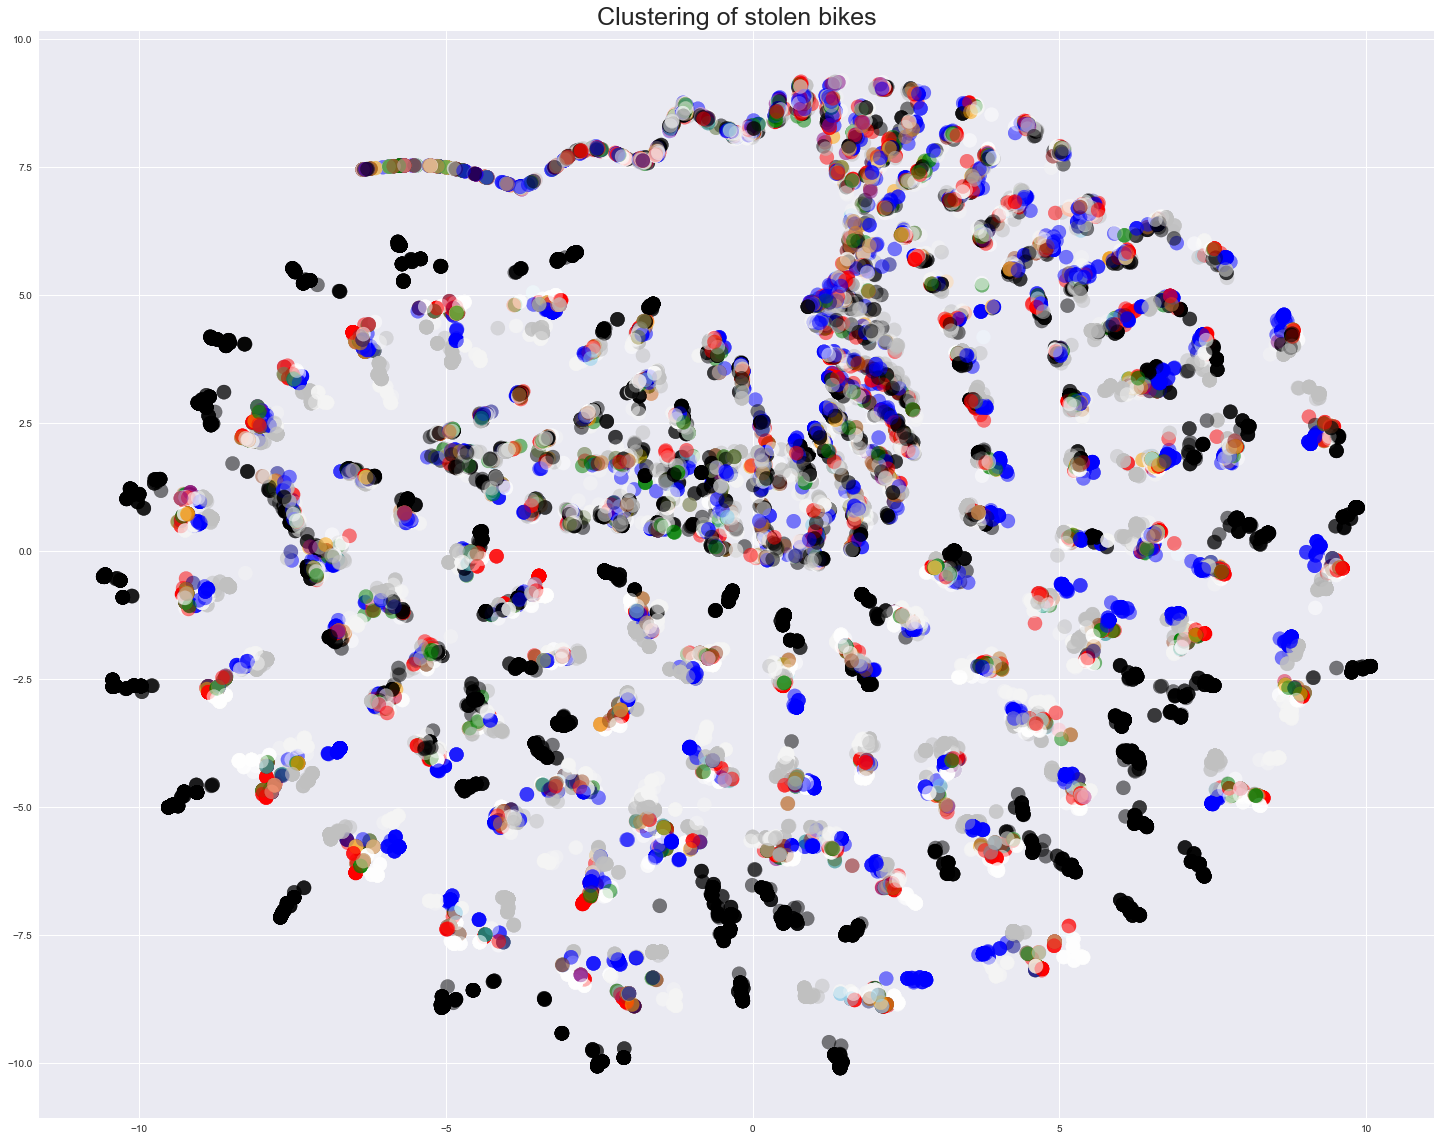

In [87]:
plt.figure(figsize = (25,20))

plt.scatter(final_stolen["tse_0"], final_stolen["tse_1"], c = colors, alpha = 0.5, marker = "o", s = s)

plt.title("Clustering of stolen bikes", size = '25')

plt.savefig("Stolen bike clusters")

In [121]:
final_stolen[(final_stolen["tse_0"] >= -11) & (final_stolen["tse_0"] <= -9.5) & (final_stolen["tse_1"] >= -2) &  (final_stolen["tse_1"] <= 0)]



frame_colors  frame_model        manufacturer_name  year frame_size  \
41       ['Black']        Other                     Kona  2017          m   
315      ['Black']        Other                     Trek  2017          m   
630      ['Black']        Other                  Raleigh  2017          m   
920      ['Black']        Other                     Trek  2017          m   
942      ['Black']        Other               Firmstrong  2017          m   
995      ['Black']        Other                     Trek  2017          m   
1129     ['Black']        Other                    Ghost  2017          m   
1527     ['Black']        Other                    Giant  2017          m   
1903     ['Black']        Other                    SCOTT  2017          m   
2336     ['Black']        Other               Cannondale  2017          m   
2553     ['Black']  Stumpjumper              Specialized  2017          m   
2667     ['Black']        Other                      6KU  2017          m   
3082     ['Black']        Other                    Surly  2017          m   
3331     ['Black']        Other                    Other  2017          m   
3490     ['Black']        Other               Cannondale  2017          m   
3497     ['Black']        Other                    Other  2017          m   
4825     ['Black']        Other              Specialized  2017          m   
5127     ['Black']        Other                  Cervélo  2017          m   
5143     ['Black']        Other                     Fuji  2017          m   
5385     ['Black']        Other               Cannondale  2017          m   
5762     ['Black']        Other              Specialized  2017          m   
5809     ['Black']        Other                     Trek  2017          m   
6189     ['Black']        Other                      REI  2017          m   
6408     ['Black']        Other                     Trek  2017          m   
7305     ['Black']    road bike                    Jamis  2017          m   
7524     ['Black']        Other                    Other  2017          m   
7867     ['Black']        Other  Rocky Mountain Bicycles  2017          m   
8891     ['Black']        Other              Specialized  2017          m   
8906     ['Black']        Other               Cannondale  2017          m   
8910     ['Black']        Other                     Trek  2017          m   
...            ...          ...                      ...   ...        ...   
16900    ['Black']        Other                     Trek  2017          m   
17294    ['Black']        Other              Marin Bikes  2017          m   
17621    ['Black']        Other                      MEC  2017          m   
17963    ['Black']        Other                    Other  2017          m   
18017    ['Black']       Sirrus              Specialized  2017          m   
18061    ['Black']        Other                  Origin8  2017          m   
18173    ['Black']        Other                    Giant  2017          m   
18270    ['Black']        Other                    Other  2017          m   
18580    ['Black']        Other                  Intense  2017          m   
18851    ['Black']        Other                     Cube  2017          m   
19137    ['Black']        Other              Diamondback  2017          m   
19385    ['Black']   Coda Sport                    Jamis  2017          m   
19576    ['Black']        Other                  Raleigh  2017          m   
19944    ['Black']        Other                     Trek  2017          m   
20114    ['Black']     Escape 3                    Giant  2017          m   
20184    ['Black']        Other                     Look  2017          m   
21435    ['Black']        Other                    Giant  2017          m   
21436    ['Black']        Other                    Giant  2017          m   
21667    ['Black']        Other                Rodriguez  2017          m   
22124    ['Black']        Other                     Trek  2017          m   
22

In [90]:
final_stolen[(final_stolen["tse_0"] <= -10) & (final_stolen["tse_1"] <= 5) & (final_stolen["tse_1"] >= 0)]

Empty DataFrame
Columns: [frame_colors, frame_model, manufacturer_name, year, frame_size, type_of_cycle, rear_tire_narrow, tse_0, tse_1]
Index: []

In [91]:
police_stolen.head()

frame_colors police_report_number frame_model manufacturer_name  \
0           ['Black']                  NaN       Other             Surly   
1             ['Red']                  NaN       Other              Trek   
2            ['Blue']                  NaN      7.1 FX              Trek   
3            ['Blue']                  NaN    Marlin 5              Trek   
4  ['Yellow or Gold']                  NaN         NaN           Schwinn   

     year frame_material frame_size type_of_cycle rear_tire_narrow  \
0  2019.0            NaN        NaN          Bike             True   
1  2008.0      composite          m          Bike             True   
2  2012.0            NaN        NaN          Bike            False   
3  2019.0            NaN          m          Bike             True   
4     NaN            NaN        NaN          Bike             True   

  front_tire_narrow  lock_defeat_description  \
0               NaN                      NaN   
1              True                      NaN   
2             False                      NaN   
3               NaN                      NaN   
4               NaN                      NaN   

                               locking_description  
0  Lock was opened, and left unharmed at the scene  
1                                              NaN  
2                                              NaN  
3                                              NaN  
4                                              NaN

In [ ]:
police_stolen["police_report_number"].count()